In [5]:
import mysql.connector
import numpy as np
import sys
sys.path.append('../Python')
import utils

/Users/milk/Desktop/GIL_Lab/BMO/BMO_chatbot_prototype/bmo-venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-04-24 16:57:13.879398: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
#CONNECT TO THE SQL DATABASE
mydb = mysql.connector.connect(
  host="us-cdbr-east-06.cleardb.net",
  user="b50281fd4181c6",
  password="12b4a1bb",
  database="heroku_2f2d25ae5fc707a"
)

mycursor = mydb.cursor()

In [7]:
s = "SELECT user_label, SPRITE_HEX FROM sprite_labels WHERE is_unknown = 1 OR user_label is NOT NULL ORDER BY timestamp DESC"

mycursor.execute(s)
all_sprites = mycursor.fetchall()
print(len(all_sprites))
    

1691


In [8]:
s = "SELECT user_label, SPRITE_HEX FROM sprite_labels WHERE user_label is NOT NULL ORDER BY timestamp DESC"

mycursor.execute(s)
labelled_sprites = mycursor.fetchall()
print(len(labelled_sprites))
print(f"percentage of labelled sprites - {len(labelled_sprites) / len(all_sprites)}%")

800
percentage of labelled sprites - 0.47309284447072736%


In [9]:
s = "SELECT user_label, SPRITE_HEX FROM sprite_labels WHERE is_unknown = 1 ORDER BY timestamp DESC"

mycursor.execute(s)
unknown_sprites = mycursor.fetchall()
print(len(unknown_sprites))
print(f"percentage of unknown sprites - {len(unknown_sprites) / len(all_sprites)}%")

909
percentage of unknown sprites - 0.537551744529864%


In [10]:
s = "SELECT user_label, SPRITE_HEX FROM sprite_labels WHERE is_unknown = 1 AND user_label is NOT NULL ORDER BY timestamp DESC"
mycursor.execute(s)
unknown_sprites_with_labels = mycursor.fetchall()
print(len(unknown_sprites_with_labels))
print(f"percentage of unknown sprites with labels - {len(unknown_sprites_with_labels) / len(all_sprites)}%")

18
percentage of unknown sprites with labels - 0.010644589000591367%


In [11]:
# convert hex string to np array
def convert_hex_to_np(hex_string):
    return np.fromiter((int(x, 16) for x in hex_string if x!=''), dtype=np.int32)

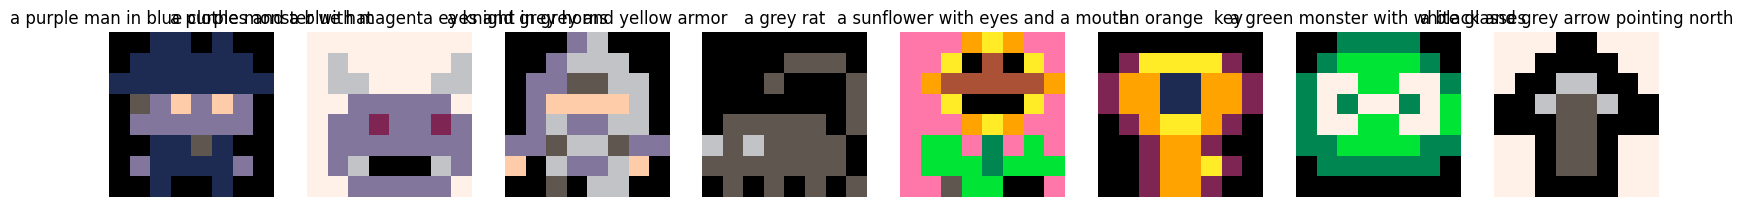

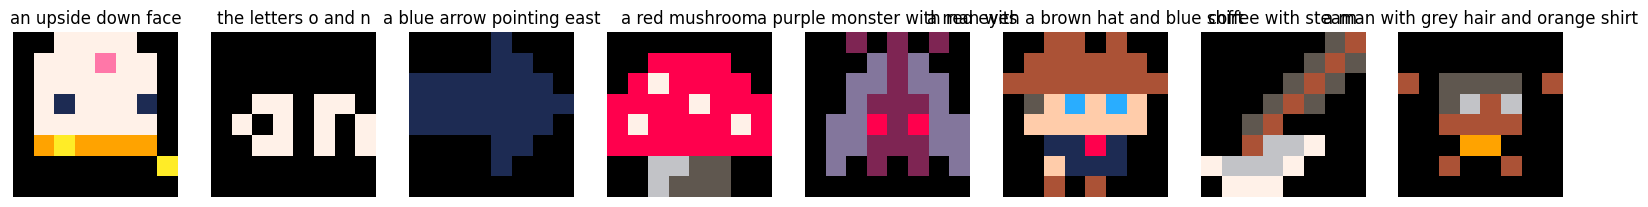

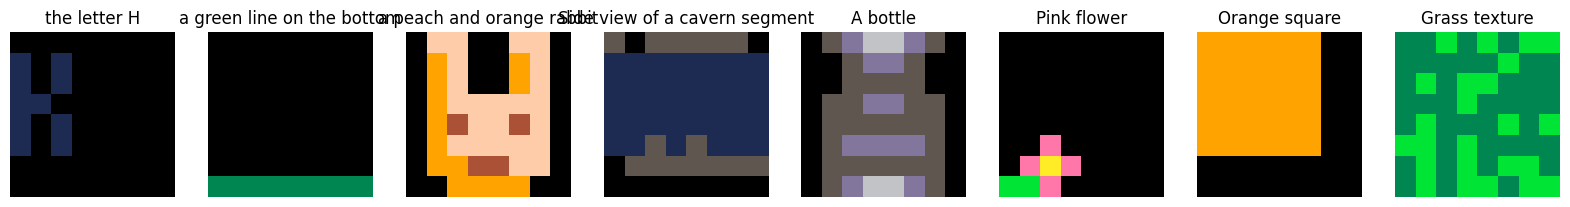

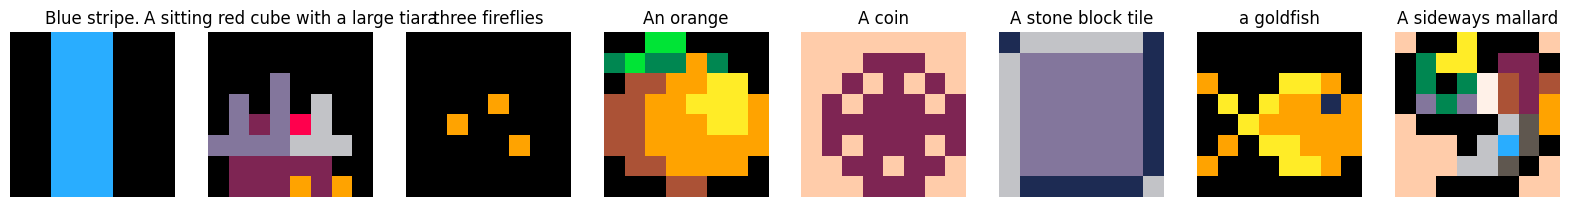

In [13]:
for i in range(0, 32, 8):
    utils.showMultiSprPalette([convert_hex_to_np(sprite[1]).reshape(8,8) for sprite in labelled_sprites[i:i+8]], textArr=[sprite[0] for sprite in labelled_sprites[i:i+8]])

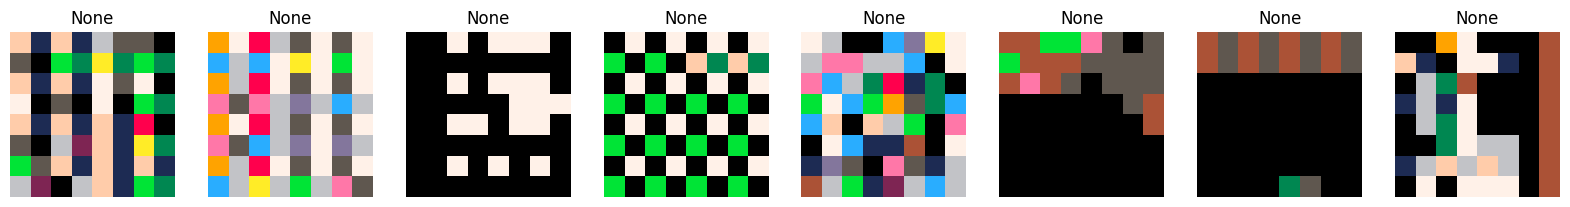

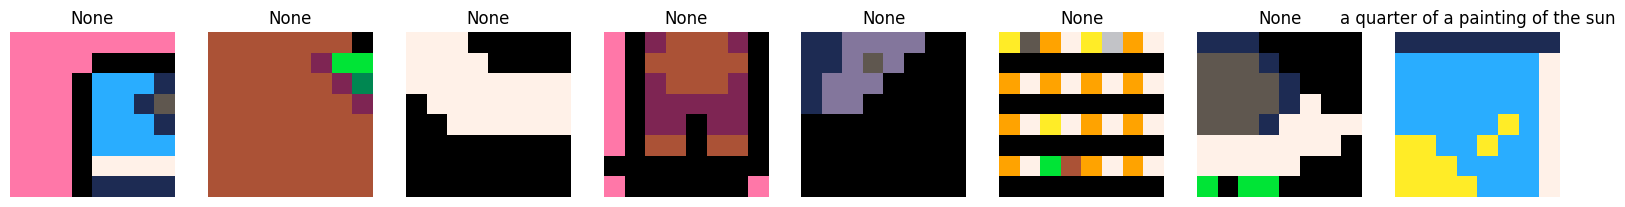

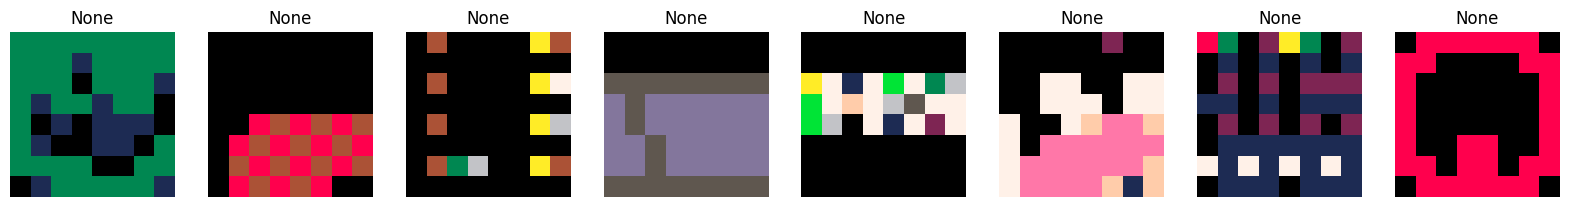

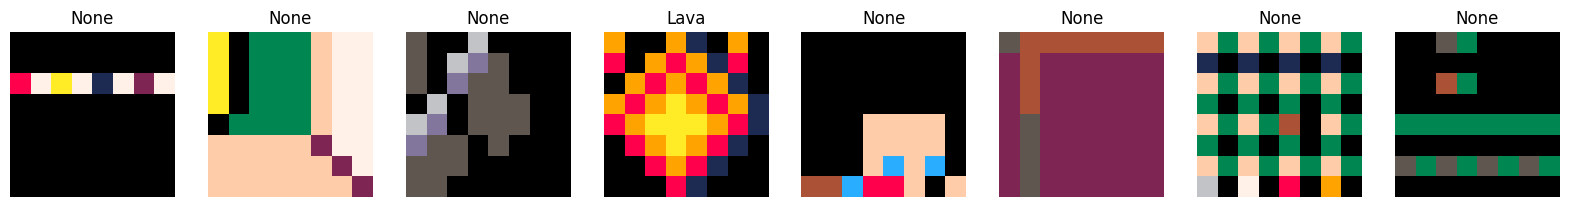

In [14]:
for i in range(0, 32, 8):
    utils.showMultiSprPalette([convert_hex_to_np(sprite[1]).reshape(8,8) for sprite in unknown_sprites[i:i+8]], textArr=[sprite[0] for sprite in unknown_sprites[i:i+8]])